# **1-parsing fenviz articles data** 


In [1]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup


extraire l'url de la page et aussi les 'Tickers' don't on s'interesse


In [2]:
finviz_url='https://finviz.com/quote.ashx?t='
markets=['AMZN','TSLA','FB','NFLX','GOOGL','AAPL','MSFT']

maintenant il faut demander les données à partir de l'url en utilisant les modules importé ulterieurement

In [3]:
news_tables={}


for market in markets:
  url=finviz_url+market

  req=Request(url=url,headers={'user-agent':'my-app'})
  reponse=urlopen(req)
  
  html=BeautifulSoup(reponse,'html')
  news_table=html.find(id="news-table")
  news_tables[market]=news_table

# ***2-Parsing and Manipulating Finviz Data***


obtenir le titre et la date de chaque article pour un marché spécifique, pour obtenir la data qui concerne AMZN par exemple on fait comme suite:

In [ ]:
'''
AMZN_data=news_tables['AMZN']

AMZN_rows=AMZN_data.findall('tr')

for index,row in enume(rateAMZN_rows):

  title=row.a.text
  date=row.td.text


  '''


"\nAMZN_data=news_tables['AMZN']\n\nAMZN_rows=AMZN_data.findall('tr')\n\nfor index,row in enume(rateAMZN_rows):\n\n  title=row.a.text\n  date=row.td.text\n\n\n  "

mainenant on construit une fonction general pour automatizé ca:

In [4]:
parsed_data=[]
for market,news_table in news_tables.items():

  for row in news_table.findAll('tr'):
    title=row.a.text
    date_data=row.td.text.split(' ')

    if len(date_data)==1:
      time=date_data[0]

    else:
      time=date_data[1]
      date=date_data[0]
    parsed_data.append([market,date,time,title])
    


organisation de la data extrait dans une table

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(parsed_data, columns=['market', 'date', 'time', 'title'])
df

,market,date,time,title
0,AMZN,Jun-03-21,06:04AM,Amazon Ring's neighborhood watch app is making...
1,AMZN,Jun-03-21,06:00AM,Influencers with Andy Serwer: Todd Boehly
2,AMZN,Jun-03-21,06:00AM,Heritage dispute engulfs site chosen for Amazo...
3,AMZN,Jun-03-21,06:00AM,Amazon Ring's neighborhood watch app is making...
4,AMZN,Jun-03-21,03:55AM,France's Casino expands Amazon partnership wit...
...,...,...,...,...
695,MSFT,May-24-21,05:33AM,10 Best Income Stocks to Invest In
696,MSFT,May-23-21,05:07PM,Top 4 Mutual Fund Holders of Microsoft (MSFT)
697,MSFT,May-23-21,08:00AM,Bosses Still Arent Sure Remote Workers Have Hu...
698,MSFT,May-22-21,09:41AM,Danielle Shay Says Microsoft Is One Of The Bes...


In [7]:
import pickle
with open('model_pickle1','rb') as file:
    mp = pickle.load(file)

C:\Users\r_pc\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\r_pc\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\r_pc\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\r_pc\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid re

In [8]:
results=mp.predict(df.title)
results_arr = pd.DataFrame(results, 
             columns=['sentiment_result'])
final_tableau = pd.concat([df, results_arr], axis='columns')
final_tableau

,market,date,time,title,sentiment_result
0,AMZN,Jun-03-21,06:04AM,Amazon Ring's neighborhood watch app is making...,neutral
1,AMZN,Jun-03-21,06:00AM,Influencers with Andy Serwer: Todd Boehly,neutral
2,AMZN,Jun-03-21,06:00AM,Heritage dispute engulfs site chosen for Amazo...,positive
3,AMZN,Jun-03-21,06:00AM,Amazon Ring's neighborhood watch app is making...,neutral
4,AMZN,Jun-03-21,03:55AM,France's Casino expands Amazon partnership wit...,positive
...,...,...,...,...,...
695,MSFT,May-24-21,05:33AM,10 Best Income Stocks to Invest In,positive
696,MSFT,May-23-21,05:07PM,Top 4 Mutual Fund Holders of Microsoft (MSFT),neutral
697,MSFT,May-23-21,08:00AM,Bosses Still Arent Sure Remote Workers Have Hu...,positive
698,MSFT,May-22-21,09:41AM,Danielle Shay Says Microsoft Is One Of The Bes...,positive


In [9]:
final_tableau['score']=final_tableau['sentiment_result'].apply(lambda x: 1 if x=='positive' else 0 if x=='neutral'else -1)
final_tableau

,market,date,time,title,sentiment_result,score
0,AMZN,Jun-03-21,06:04AM,Amazon Ring's neighborhood watch app is making...,neutral,0
1,AMZN,Jun-03-21,06:00AM,Influencers with Andy Serwer: Todd Boehly,neutral,0
2,AMZN,Jun-03-21,06:00AM,Heritage dispute engulfs site chosen for Amazo...,positive,1
3,AMZN,Jun-03-21,06:00AM,Amazon Ring's neighborhood watch app is making...,neutral,0
4,AMZN,Jun-03-21,03:55AM,France's Casino expands Amazon partnership wit...,positive,1
...,...,...,...,...,...,...
695,MSFT,May-24-21,05:33AM,10 Best Income Stocks to Invest In,positive,1
696,MSFT,May-23-21,05:07PM,Top 4 Mutual Fund Holders of Microsoft (MSFT),neutral,0
697,MSFT,May-23-21,08:00AM,Bosses Still Arent Sure Remote Workers Have Hu...,positive,1
698,MSFT,May-22-21,09:41AM,Danielle Shay Says Microsoft Is One Of The Bes...,positive,1


In [10]:
tableau_df = final_tableau.groupby(['market', 'date']).mean()
tableau_df

score
market date               
AAPL   Jun-01-21  0.153846
       Jun-02-21  0.133333
       May-26-21  0.222222
       May-27-21  0.266667
       May-28-21  0.115385
...                    ...
TSLA   Jun-03-21  0.142857
       May-28-21  0.500000
       May-29-21  0.200000
       May-30-21  0.000000
       May-31-21  0.000000

[66 rows x 1 columns]

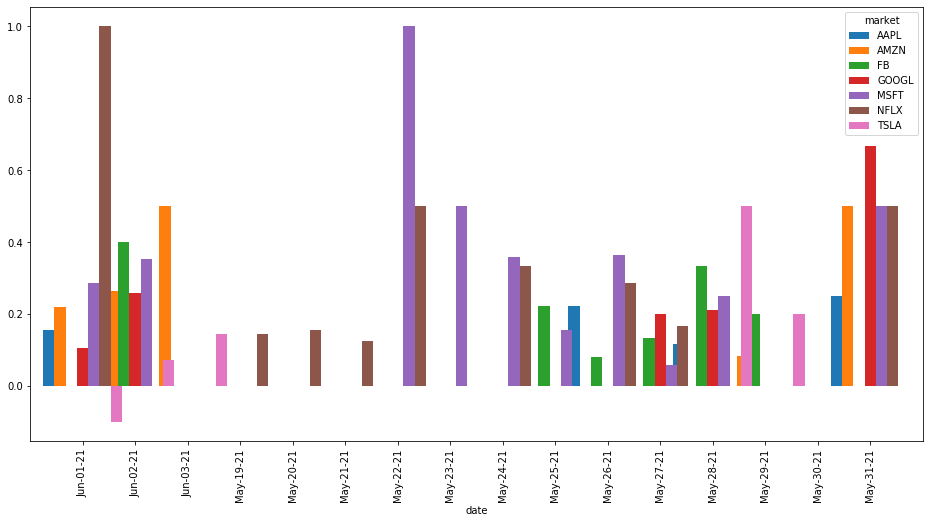

In [13]:
tableau_df  = final_tableau.groupby(['market', 'date']).mean().unstack()
tableau_df  = tableau_df.xs('score', axis="columns").transpose()
tableau_df .plot(kind='bar',figsize=(16,8),width=1.5)

# ***3-Applying Sentiment Analysis***



Il est maintenant temps d'effectuer une analyse des sentiments avec nltk.sentiment.vader:

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\r_pc\AppData\Roaming\nltk_data...


In [11]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

In [12]:
df

,market,date,time,title,compound
0,AMZN,May-31-21,09:00AM,How MGM Helps Transform Amazon Prime Video,0.5106
1,AMZN,May-31-21,08:47AM,2 Best Value Stocks to Buy Now,0.7650
2,AMZN,May-31-21,08:30AM,2 Stocks for Beginning Investors,0.0000
3,AMZN,May-31-21,06:31AM,4 Stocks to Watch as Demand for Video Streamin...,-0.1280
4,AMZN,May-31-21,05:51AM,5 Stocks That Can Help You Achieve Financial F...,0.7845
...,...,...,...,...,...
695,MSFT,May-20-21,01:39PM,Microsoft To Retire Internet Explorer Next Year,0.0000
696,MSFT,May-20-21,12:15PM,Dow Jones Rallies As Jobless Claims Fall To Pa...,-0.2732
697,MSFT,May-20-21,10:50AM,"ByteDance CEO to step Down, Amazon sued over a...",0.1779
698,MSFT,May-20-21,08:30AM,Should Salesforce Investors Be Worried About M...,-0.2960


In [12]:
df['date'] = pd.to_datetime(df.date).dt.date
df

,market,date,time,title
0,AMZN,2021-06-03,06:04AM,Amazon Ring's neighborhood watch app is making...
1,AMZN,2021-06-03,06:00AM,Influencers with Andy Serwer: Todd Boehly
2,AMZN,2021-06-03,06:00AM,Heritage dispute engulfs site chosen for Amazo...
3,AMZN,2021-06-03,06:00AM,Amazon Ring's neighborhood watch app is making...
4,AMZN,2021-06-03,03:55AM,France's Casino expands Amazon partnership wit...
...,...,...,...,...
695,MSFT,2021-05-24,05:33AM,10 Best Income Stocks to Invest In
696,MSFT,2021-05-23,05:07PM,Top 4 Mutual Fund Holders of Microsoft (MSFT)
697,MSFT,2021-05-23,08:00AM,Bosses Still Arent Sure Remote Workers Have Hu...
698,MSFT,2021-05-22,09:41AM,Danielle Shay Says Microsoft Is One Of The Bes...


In [14]:
df.title[4]

'5 Stocks That Can Help You Achieve Financial Freedom'

# ***4-Visualization of Sentiment Analysis***





Le code suivant prend la moyenne des scores de sentiment pour tous les titres d'actualité collectés à chaque date et la trace sur un 'bar chart'. nous avons besoin des scores moyens pour chaque jour, pour obtenir le sentiment général pour une journée.

In [15]:

mean_df = df.groupby(['market', 'date']).mean()

In [16]:

mean_df

compound
market date                
AAPL   2021-05-24  0.000000
       2021-05-25  0.226170
       2021-05-26  0.255146
       2021-05-27  0.248540
       2021-05-28  0.106918
...                     ...
TSLA   2021-05-27  0.158850
       2021-05-28  0.078821
       2021-05-29  0.218260
       2021-05-30 -0.075433
       2021-05-31  0.238167

[62 rows x 1 columns]

In [30]:
%matplotlib inline

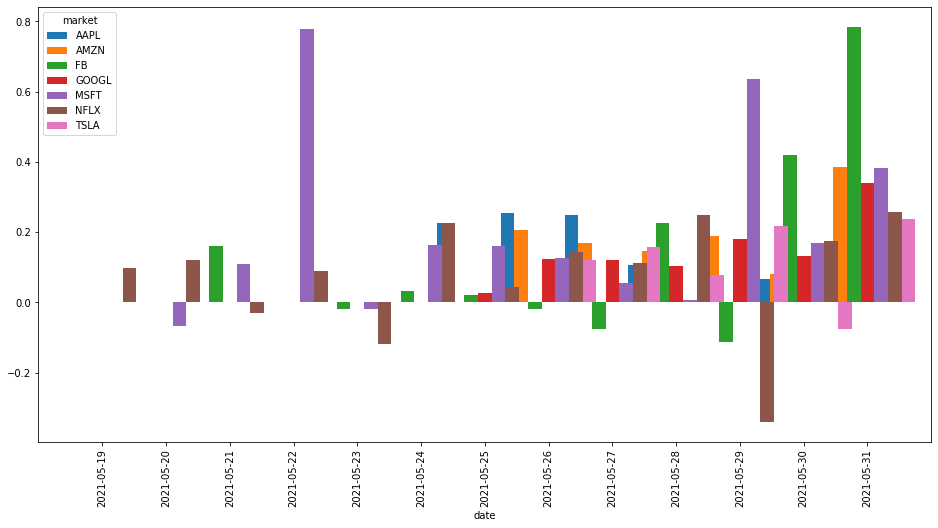

In [31]:

mean_df = df.groupby(['market', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar',figsize=(16,8),width=1.5)

 on voit donc l'evoulution du sentiment général pour une journée